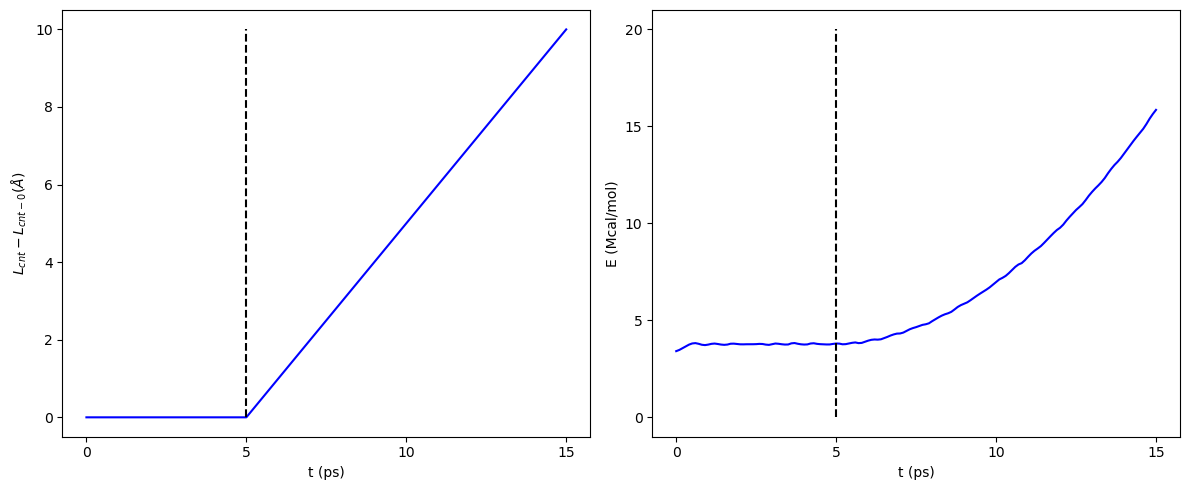

In [85]:
import numpy as np
import matplotlib.pyplot as plt

file = r"C:\Users\Rio Agustian\AppData\Local\LAMMPS 64-bit 12Jun2025\DATA\unbreakable-bonds\number_data.txt"

# Data
data = np.loadtxt(file, skiprows=1)
steps = data[:, 0] * 0.001
temp  = data[:, 1]
etot  = data[:, 2] * 0.001
v_Lcnt = data[:, 3]
v_Fcnt = data[:, 4]

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(steps, v_Lcnt-v_Lcnt[0], color='blue')
plt.xticks([0, 5, 10, 15]) 
plt.xlabel("t (ps)")
plt.ylabel("$L_{cnt}-L_{cnt-0}(Å)$")
plt.vlines(x=5, ymin=0, ymax=10, color='k', ls='--')

plt.subplot(122)
plt.plot(steps, etot, color='blue')
plt.xticks([0, 5, 10, 15])
plt.yticks([0, 5, 10, 15, 20])
plt.vlines(x=5, ymin=0, ymax=20, color='k', ls='--')
plt.xlabel("t (ps)")
plt.ylabel("E (Mcal/mol)")

plt.tight_layout()  # Adjust layout to fit suptitle
plt.savefig("my_plot_1.png")
plt.show()

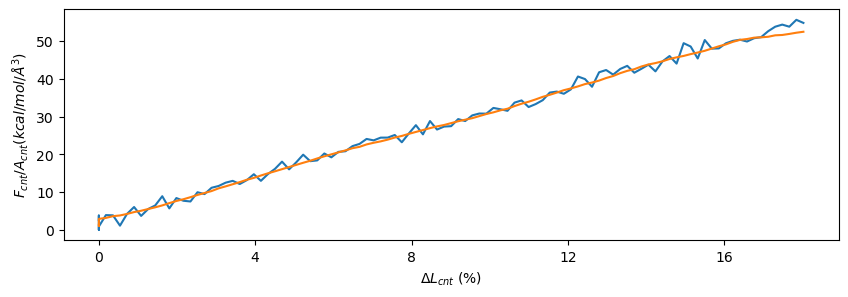

In [104]:
area = np.pi * 5.2**2 # angstrom^2
length = v_Lcnt
force  = v_Fcnt
stress = force/area # Kcal/mol/angstrom^3
strain = 100 * (length-length[0])/length[0]
window = 10
def mov_avg(data, window):
    new_data = []
    for i in range(window, len(data)):
        point = np.average(data[i-window:i+window])
        new_data.append(abs(point))
    return new_data
new_stress = mov_avg(stress, window)

plt.figure(figsize=(10,3))
plt.plot(strain, abs(stress))
plt.plot(strain[window:], new_stress)
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xticks([0, 4, 8, 12, 16])
plt.xlabel(r"$\Delta L_{cnt}$ (%)")
plt.ylabel(r"$F_{cnt}/A_{cnt} (kcal/mol/Å^3)$")
plt.savefig("my_plot_2.png")
plt.show()